## OML4Py 

- Leichtere Datenbankzugriffe (Select, Insert, Update)
- Verlagern von Objekten  auf den Datenbank-Server HPC für Python
- Verlagern von Skripten in die Datenbank - gemeinsame Skript-Ablage und Koppeln von Python-Skripten mit SQL
- Aufruf von ML-Algorithmen in der Datenbank
- AutoML


In [6]:
# OML-Modul
import oml
oml.__path__        # Speicherort der Library

['D:\\Anaconda\\lib\\site-packages\\oml']

In [5]:
import matplotlib.pyplot as plt

In [7]:
# Connect in bestehendes DB-Schema (GRANT OMLADMIN)   
oml.connect(user="DWH",password="DWH",dsn="(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=localhost)  (PORT=1523))(CONNECT_DATA=(SID=orcl19)))")
     

In [8]:
# Prüfen, ob die Verbindung steht
oml.isconnected()

True

In [9]:
# In welchen Datenbank "blickt" meine Umgebung jetzt?
oml.cursor()

<cx_Oracle.Cursor on <cx_Oracle.Connection to DWH@(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=localhost)  (PORT=1523))(CONNECT_DATA=(SID=orcl19)))>>

In [9]:
# Connect in neues Schema zu Demo-Zwecken
oml.connect(user="pyquser",password="pyquser",dsn="(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=localhost)  (PORT=1523))(CONNECT_DATA=(SID=orcl19)))")

In [25]:
# Prüfen, ob die Verbindung steht
oml.isconnected()

True

Verlagern von Objekten (in diesem Fall ein Pandas DataFrame ) in die Datenbank. Ziel HPC

In [10]:
# Ein Objekt wird in der lokalen Entwicklungsumgebung angelegt 
import pandas as pd
x = pd.DataFrame({
    'GENDER': ['M','M','F','M','F'],
    'HAND': ['L','R','R','R','L'],
    'SPEED': [40.5,30.4,60.8,50.4,61.5],
    'ACCURACY': [.92,.94,.84,.88,.91]
})
print(x)
type(x)

  GENDER HAND  SPEED  ACCURACY
0      M    L   40.5      0.92
1      M    R   30.4      0.94
2      F    R   60.8      0.84
3      M    R   50.4      0.88
4      F    L   61.5      0.91


pandas.core.frame.DataFrame

In [12]:
# Mit der Option push wird dieses Objekt in die 
X = oml.push(x)


In [13]:
print("Typ X:" , type(X))

Typ X: <class 'oml.core.frame.DataFrame'>


In [14]:
# Mit diesem Objekt in der Datenbank, kann jetzt gearbeitet werden, als ob es weiterhin ein
#  lokales Objekt wäre
print("Typ X:" , type(X))
print()
# Ausgeben der Spaltennamen
print("Die Spalten desn neuen Objektes in der DB sind: ", X.columns)
# Zählen der Vorkommen
res = X.crosstab('GENDER', 'HAND').sort_values('count',ascending=False)
print("Type res:" , type(res))
res

Typ X: <class 'oml.core.frame.DataFrame'>

Die Spalten desn neuen Objektes in der DB sind:  ['GENDER', 'HAND', 'SPEED', 'ACCURACY']
Type res: <class 'oml.core.frame.DataFrame'>


  GENDER HAND  count
0      M    R      2
1      F    L      1
2      F    R      1
3      M    L      1

Eine Datenbank-Tabelle aus dem Objekt erstellen

In [15]:
try:
    oml.drop(table="TB_X")
except:
    pass


In [15]:

try:
    oml.drop(table="TB_X")
except:
    pass
oml.create(x,'TB_X')

  GENDER HAND  SPEED  ACCURACY
0      M    L   40.5      0.92
1      M    R   30.4      0.94
2      F    R   60.8      0.84
3      M    R   50.4      0.88
4      F    L   61.5      0.91

In [16]:
# Die Tabelle wieder lesen: Über oml.sync() die Metadaten aus der DB holen
y = oml.sync(table="TB_X")
print(y.columns)
y.shape

['GENDER', 'HAND', 'SPEED', 'ACCURACY']


(5, 4)

In [13]:
y.crosstab

<bound method DataFrame.crosstab of   GENDER HAND  SPEED  ACCURACY
0      M    L   40.5      0.92
1      M    R   30.4      0.94
2      F    R   60.8      0.84
3      M    R   50.4      0.88
4      F    L   61.5      0.91>

In [11]:
# In die bestehende Tabelle einen Satz eintragen

# ein Objekt mit neuem Satz machen
z = pd.DataFrame({
    'GENDER': ['X'],
    'HAND': ['O'],
    'SPEED': [44.5],
    'ACCURACY': [.95]
})

# aus dem neuen Objekt vom type Data Frame ein Objekt vom Type ore.frame machen
oz = oml.push(z)

print(type(y))
print(type(z))
print(type(oz))

# den neuen Satz anhängen
y.append(oz)

<class 'oml.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'oml.core.frame.DataFrame'>


  GENDER HAND  SPEED  ACCURACY
0      M    L   40.5      0.92
1      M    R   30.4      0.94
2      F    R   60.8      0.84
3      M    R   50.4      0.88
4      F    L   61.5      0.91
5      X    O   44.5      0.95

In [34]:
res = [x for x in y.__dir__() if not x.startswith('_')]
res.sort()
res

['KFold',
 'append',
 'columns',
 'concat',
 'corr',
 'count',
 'create_view',
 'crosstab',
 'cumsum',
 'describe',
 'drop',
 'drop_duplicates',
 'dropna',
 'dtypes',
 'head',
 'kurtosis',
 'materialize',
 'max',
 'mean',
 'median',
 'merge',
 'min',
 'nunique',
 'pivot_table',
 'pull',
 'rename',
 'round',
 'select_types',
 'shape',
 'skew',
 'sort_values',
 'split',
 'std',
 'sum',
 't_dot',
 'tail']

## Beispiel bestehende Tabelle in der DB  D_KUNDE DWH-User 

In [18]:
oml.connect(user="pyquser",password="pyquser",dsn="(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=localhost)  (PORT=1523))(CONNECT_DATA=(SID=orcl19)))")
oml.isconnected()

True

In [19]:
# Metadaten aus der DB lesen
kunde = oml.sync(table="D_KUNDE")

In [23]:
print(dir())
oml.dir()

['In', 'Out', '_', '_1', '_12', '_13', '_14', '_16', '_17', '_19', '_2', '_20', '_21', '_22', '_5', '_7', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i2', '_i20', '_i21', '_i22', '_i23', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'exit', 'get_ipython', 'kunde', 'oml', 'pd', 'plt', 'quit', 'x']


['kunde']

In [20]:
# Struktur
kunde.shape

(3221, 43)

In [19]:
# Durchzählen aller Werte pro Column, die nicht NULL sind
kunde.count()

X                         3221
KUNDEN_NR                 3221
KD_GRUPPEN_NR             3221
VORNAME                   2947
NACHNAME                  3221
ANREDE                    3221
LEBENSALTER               3221
GESCHLECHT                3221
STAND                     3221
WOHNART_NR                3221
BILDUNGS_NR               3221
GEHALT                    3221
BERUFSGRUPPEN_NR          3221
EIGENTUM                  3221
ANZ_KINDER                3221
BERUF_NR                  3221
KRITISCHER_KUNDE          3221
SPONTANER_KUNDE           3221
LFD_ORT_NR                3221
ORT_NR                    3221
PLZ                       3221
LON                       3221
LAT                       3221
ORT                       3221
ANZAHL_KAEUFE_JAHR        3221
UMSATZ_JAHR               3221
UMSATZ                    3221
BILDUNG                   3221
BERUF                     3221
WOHNART                   3221
BERUFSGRUPPE              3221
EINKOMMENSGRUPPEN_NR      3221
EINKOMME

In [20]:
# Maximal-Werte nur für numerische Spalten Anzeigen
kunde.max(numeric_only = True)

X                           3220.000000
KUNDEN_NR                   3220.000000
KD_GRUPPEN_NR                 10.000000
LEBENSALTER                   82.000000
GESCHLECHT                     1.000000
STAND                          4.000000
WOHNART_NR                    16.000000
BILDUNGS_NR                   11.000000
GEHALT                    125148.000000
BERUFSGRUPPEN_NR              13.000000
EIGENTUM                       1.000000
ANZ_KINDER                     4.000000
BERUF_NR                      34.000000
KRITISCHER_KUNDE               1.000000
SPONTANER_KUNDE                1.000000
LFD_ORT_NR                  8278.000000
ORT_NR                    153662.000000
PLZ                        99898.000000
LON                           14.984191
LAT                           54.937240
ANZAHL_KAEUFE_JAHR            40.000000
UMSATZ_JAHR                 4515.000000
UMSATZ                      4515.000000
EINKOMMENSGRUPPEN_NR           8.000000
BONITAET                       9.000000


In [21]:
# Nach Spalten sortieren
kunde.sort_values(by = ['LEBENSALTER'])

         X  KUNDEN_NR  KD_GRUPPEN_NR    VORNAME     NACHNAME ANREDE  \
0      211        211              6     Walter  Waldmeister   Herr   
1      213        213              6      Frank   Hausschild   Herr   
2      217        217              6       Finn       Friese   Herr   
3      135        135              1     Sophie        Bauer   Frau   
4       68         68              1      Petra     Petersen   Frau   
...    ...        ...            ...        ...          ...    ...   
3216  2995       2995             10     Moritz     Rohrdamm   Herr   
3217  2799       2799              5      Sonja     Lachmann   Frau   
3218  3162       3162             10  Heinemann         Dahl   Herr   
3219  2949       2949             10     Moritz      Schmidt   Herr   
3220  2882       2882              5      Sonja   Baumeister   Frau   

      LEBENSALTER  GESCHLECHT  STAND  WOHNART_NR  ...  BONITAET  KREDITFAEHIG  \
0               9           0      1           3  ...         2   

In [24]:
# alle Spaltennamen
kunde.columns

['X',
 'KUNDEN_NR',
 'KD_GRUPPEN_NR',
 'VORNAME',
 'NACHNAME',
 'ANREDE',
 'LEBENSALTER',
 'GESCHLECHT',
 'STAND',
 'WOHNART_NR',
 'BILDUNGS_NR',
 'GEHALT',
 'BERUFSGRUPPEN_NR',
 'EIGENTUM',
 'ANZ_KINDER',
 'BERUF_NR',
 'KRITISCHER_KUNDE',
 'SPONTANER_KUNDE',
 'LFD_ORT_NR',
 'ORT_NR',
 'PLZ',
 'LON',
 'LAT',
 'ORT',
 'ANZAHL_KAEUFE_JAHR',
 'UMSATZ_JAHR',
 'UMSATZ',
 'BILDUNG',
 'BERUF',
 'WOHNART',
 'BERUFSGRUPPE',
 'EINKOMMENSGRUPPEN_NR',
 'EINKOMMENSGRUPPE',
 'BONITAET',
 'KREDITFAEHIG',
 'SCHNAEPPCHENJAEGER',
 'GEHOBENER_PREIS_KUNDE',
 'NIEDRIG_PREIS_KUNDE',
 'KUNDENTYP',
 'BERUFSKLASSE',
 'ANZAHL_WERBUNG_MONAT',
 'FREQUENZ_BESUCHE_MONAT',
 'Gen_Datum']

In [22]:
# Statistische Verteilungen über alle nummerischen Spalten
kunde.describe()

X    KUNDEN_NR  KD_GRUPPEN_NR  LEBENSALTER   GESCHLECHT  \
count  3221.000000  3221.000000    3221.000000  3221.000000  3221.000000   
mean   1610.152748  1610.152748       5.663459    44.844769     0.497051   
std     929.742788   929.742788       2.883407    14.803562     0.500069   
min       1.000000     1.000000       1.000000     9.000000     0.000000   
25%     805.000000   805.000000       3.000000    34.000000     0.000000   
50%    1610.000000  1610.000000       6.000000    45.000000     0.000000   
75%    2415.000000  2415.000000       8.000000    54.000000     1.000000   
max    3220.000000  3220.000000      10.000000    82.000000     1.000000   

             STAND   WOHNART_NR  BILDUNGS_NR         GEHALT  BERUFSGRUPPEN_NR  \
count  3221.000000  3221.000000  3221.000000    3221.000000       3221.000000   
mean      2.209562     7.844769     5.833903   35050.123875          7.518162   
std       0.986799     3.927067     2.477359   20330.135947          3.734687   
min       1.000000     1.000000     2.000000  -46042.000000          1.000000   
25%       1.000000     5.000000     4.000000   21169.000000          4.000000   
50%       2.000000     8.000000     5.000000   33581.000000          8.000000   
75%       3.000000    11.000000     8.000000   47817.000000         10.000000   
max       4.000000    16.000000    11.000000  125148.000000         13.000000   

       ...  EINKOMMENSGRUPPEN_NR     BONITAET  KREDITFAEHIG  \
count  ...           3221.000000  3221.000000   3221.000000   
mean   ...              4.154300     3.935424      0.069233   
std    ...              1.220975     1.607491      0.253890   
min    ...              1.000000    -2.000000      0.000000   
25%    ...              4.000000     3.000000      0.000000   
50%    ...              4.000000     4.000000      0.000000   
75%    ...              5.000000     5.000000      0.000000   
max    ...              8.000000     9.000000      1.000000   

       SCHNAEPPCHENJAEGER  GEHOBENER_PREIS_KUNDE  NIEDRIG_PREIS_KUNDE  \
count         3221.000000            3221.000000          3221.000000   
mean             0.249922               0.043775             0.021111   
std              0.433035               0.204626             0.143778   
min              0.000000               0.000000             0.000000   
25%              0.000000               0.000000             0.000000   
50%              0.000000               0.000000             0.000000   
75%              0.000000               0.000000             0.000000   
max              1.000000               1.000000             1.000000   

         KUNDENTYP  BERUFSKLASSE  ANZAHL_WERBUNG_MONAT  FREQUENZ_BESUCHE_MONAT  
count  3221.000000   3221.000000           3221.000000             3221.000000  
mean      0.426576      2.095622              3.980130                9.923937  
std       0.994376      1.321413              1.050692                2.288804  
min       0.000000      1.000000              0.000000                3.000000  
25%       0.000000      1.000000              3.000000                8.000000  
50%       0.000000      2.000000              4.000000               10.000000  
75%       1.000000      3.000000              5.000000               11.000000  
max       6.000000      5.000000              8.000000               18.000000  

[8 rows x 33 columns]

In [55]:
# Statistische Verteilungen über alle nummerischen Spalten
# Verändern der Percentile-Sicht
kunde.describe(percentiles=[.33,.66])

X    KUNDEN_NR  KD_GRUPPEN_NR  LEBENSALTER   GESCHLECHT  \
count  3221.000000  3221.000000    3221.000000  3221.000000  3221.000000   
mean   1610.152748  1610.152748       5.663459    44.844769     0.497051   
std     929.742788   929.742788       2.883407    14.803562     0.500069   
min       1.000000     1.000000       1.000000     9.000000     0.000000   
33%    1062.600000  1062.600000       4.000000    39.000000     0.000000   
50%    1610.000000  1610.000000       6.000000    45.000000     0.000000   
66%    2125.200000  2125.200000       8.000000    50.000000     1.000000   
max    3220.000000  3220.000000      10.000000    82.000000     1.000000   

             STAND   WOHNART_NR  BILDUNGS_NR         GEHALT  BERUFSGRUPPEN_NR  \
count  3221.000000  3221.000000  3221.000000    3221.000000       3221.000000   
mean      2.209562     7.844769     5.833903   35050.123875          7.518162   
std       0.986799     3.927067     2.477359   20330.135947          3.734687   
min       1.000000     1.000000     2.000000  -46042.000000          1.000000   
33%       2.000000     6.000000     5.000000   25516.800000          7.000000   
50%       2.000000     8.000000     5.000000   33581.000000          8.000000   
66%       3.000000    10.000000     6.000000   42251.600000          9.000000   
max       4.000000    16.000000    11.000000  125148.000000         13.000000   

       ...  EINKOMMENSGRUPPEN_NR     BONITAET  KREDITFAEHIG  \
count  ...           3221.000000  3221.000000   3221.000000   
mean   ...              4.154300     3.935424      0.069233   
std    ...              1.220975     1.607491      0.253890   
min    ...              1.000000    -2.000000      0.000000   
33%    ...              4.000000     3.000000      0.000000   
50%    ...              4.000000     4.000000      0.000000   
66%    ...              5.000000     5.000000      0.000000   
max    ...              8.000000     9.000000      1.000000   

       SCHNAEPPCHENJAEGER  GEHOBENER_PREIS_KUNDE  NIEDRIG_PREIS_KUNDE  \
count         3221.000000            3221.000000          3221.000000   
mean             0.249922               0.043775             0.021111   
std              0.433035               0.204626             0.143778   
min              0.000000               0.000000             0.000000   
33%              0.000000               0.000000             0.000000   
50%              0.000000               0.000000             0.000000   
66%              0.000000               0.000000             0.000000   
max              1.000000               1.000000             1.000000   

         KUNDENTYP  BERUFSKLASSE  ANZAHL_WERBUNG_MONAT  FREQUENZ_BESUCHE_MONAT  
count  3221.000000   3221.000000           3221.000000             3221.000000  
mean      0.426576      2.095622              3.980130                9.923937  
std       0.994376      1.321413              1.050692                2.288804  
min       0.000000      1.000000              0.000000                3.000000  
33%       0.000000      1.000000              4.000000                9.000000  
50%       0.000000      2.000000              4.000000               10.000000  
66%       0.000000      2.000000              4.000000               11.000000  
max       6.000000      5.000000              8.000000               18.000000  

[8 rows x 33 columns]

In [19]:
# OML Workspace aufzeigen
oml.dir()

['_', 'kunde', '_18']

In [20]:
# Anzahl eindeutiger Werte in den Spalten
kunde.nunique()

X                         3220
KUNDEN_NR                 3220
KD_GRUPPEN_NR               10
VORNAME                     75
NACHNAME                    49
ANREDE                       2
LEBENSALTER                 74
GESCHLECHT                   2
STAND                        4
WOHNART_NR                  16
BILDUNGS_NR                 10
GEHALT                    3151
BERUFSGRUPPEN_NR            13
EIGENTUM                     2
ANZ_KINDER                   5
BERUF_NR                    33
KRITISCHER_KUNDE             2
SPONTANER_KUNDE              2
LFD_ORT_NR                2665
ORT_NR                    2665
PLZ                       2665
LON                       2664
LAT                       2664
ORT                       2194
ANZAHL_KAEUFE_JAHR          40
UMSATZ_JAHR               1935
UMSATZ                    1935
BILDUNG                     10
BERUF                       33
WOHNART                     16
BERUFSGRUPPE                13
EINKOMMENSGRUPPEN_NR         8
EINKOMME

In [25]:
# Anzahl NULL - Werte in den Spalten
kunde.isnull()

AttributeError: 'DataFrame' object has no attribute 'isnull'

In [ ]:
# Doppelte Einträge löschen
# Löschen von Sätzen mit NA
#  -> kunde.drop_duplicates().sort_values()

In [36]:
kunde.shape
kunde.std()

X                           929.742788
KUNDEN_NR                   929.742788
KD_GRUPPEN_NR                 2.883407
LEBENSALTER                  14.803562
GESCHLECHT                    0.500069
STAND                         0.986799
WOHNART_NR                    3.927067
BILDUNGS_NR                   2.477359
GEHALT                    20330.135947
BERUFSGRUPPEN_NR              3.734687
EIGENTUM                      0.496148
ANZ_KINDER                    0.995975
BERUF_NR                     11.084298
KRITISCHER_KUNDE              0.496997
SPONTANER_KUNDE               0.496379
LFD_ORT_NR                 2400.114102
ORT_NR                     5623.302382
PLZ                       29664.185904
LON                           2.015377
LAT                           1.857438
ANZAHL_KAEUFE_JAHR            9.575339
UMSATZ_JAHR                 814.616608
UMSATZ                      814.616608
EINKOMMENSGRUPPEN_NR          1.220975
BONITAET                      1.607491
KREDITFAEHIG             

In [20]:
# alle Spalten
kunde.columns

['X',
 'KUNDEN_NR',
 'KD_GRUPPEN_NR',
 'VORNAME',
 'NACHNAME',
 'ANREDE',
 'LEBENSALTER',
 'GESCHLECHT',
 'STAND',
 'WOHNART_NR',
 'BILDUNGS_NR',
 'GEHALT',
 'BERUFSGRUPPEN_NR',
 'EIGENTUM',
 'ANZ_KINDER',
 'BERUF_NR',
 'KRITISCHER_KUNDE',
 'SPONTANER_KUNDE',
 'LFD_ORT_NR',
 'ORT_NR',
 'PLZ',
 'LON',
 'LAT',
 'ORT',
 'ANZAHL_KAEUFE_JAHR',
 'UMSATZ_JAHR',
 'UMSATZ',
 'BILDUNG',
 'BERUF',
 'WOHNART',
 'BERUFSGRUPPE',
 'EINKOMMENSGRUPPEN_NR',
 'EINKOMMENSGRUPPE',
 'BONITAET',
 'KREDITFAEHIG',
 'SCHNAEPPCHENJAEGER',
 'GEHOBENER_PREIS_KUNDE',
 'NIEDRIG_PREIS_KUNDE',
 'KUNDENTYP',
 'BERUFSKLASSE',
 'ANZAHL_WERBUNG_MONAT',
 'FREQUENZ_BESUCHE_MONAT',
 'Gen_Datum']

In [37]:
# eine Spaltenübersicht erhalten
kunde.describe

<bound method DataFrame.describe of          X  KUNDEN_NR  KD_GRUPPEN_NR             VORNAME    NACHNAME ANREDE  \
0      151        151              1               Sissi   Schrieder   Frau   
1       92         92              1                Elke   Heinemann   Frau   
2       93         93              1          Christiane      Ristau   Frau   
3       94         94              1  Frau Gabriele Gora       Karlo   Frau   
4       95         95              1              Fatima     Schmidt   Frau   
...    ...        ...            ...                 ...         ...    ...   
3216  3113       3113             10                Bert  Zimmermann   Herr   
3217  3114       3114             10               Frank    Schiller   Herr   
3218  3115       3115             10                None        Dahl   Herr   
3219  3116       3116             10                None      Friese   Herr   
3220  3117       3117             10                None    Rohrdamm   Herr   

      LEBENSALT

In [23]:
# Crosstab : Zählt die Anzahl pro Wert durch
#    "select BERUFSGRUPPE, count(*) from D_KUNDE"
kunde.crosstab('BERUFSGRUPPE')

       BERUFSGRUPPE  count
0        Angestellt    476
1    Auszubildender     80
2    Selbststaendig    252
3          Arbeiter    517
4          Schueler     66
5             Rente    244
6           Student    156
7     nicht_erfasst    252
8   Oeffentl_Dienst    339
9        Praktikant     72
10       Arbeitslos    415
11          Trainee    136
12          Beamter    216

In [ ]:
kunde.cumsum

In [25]:
# Anlegen eines Views in der Datenbank mit Zwischenergebnissen in der Session
v_kunde = kunde.create_view(view = "v_kunde")
#tt = kunde.drop_view(view = "v_kunde")


DatabaseError: ORA-00955: name is already used by an existing object

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: The 'manage_xticks' parameter of bxp() has been renamed 'manage_ticks' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'cm')

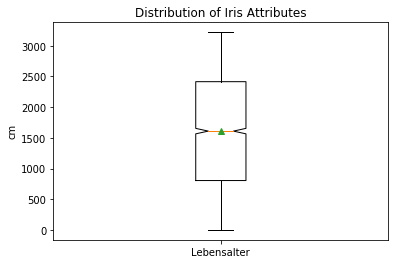

In [95]:
oml.graphics.boxplot(kunde[:, :1], notch=True, showmeans = True,labels=['Lebensalter'])
plt.title('Distribution of Iris Attributes')
plt.ylabel('cm')

Text(0.5, 0, 'Price in $1000s')

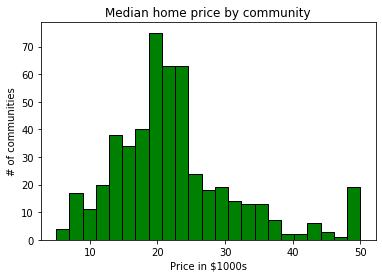

In [96]:
import oml
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
boston = load_boston()
pd_boston = pd.DataFrame({'target':boston.target})
oml_boston = oml.push(pd_boston)
oml.graphics.hist(oml_boston['target'], 'auto', color='green',
linestyle='solid', edgecolor='black')
plt.title('Median home price by community')
plt.ylabel('# of communities')
plt.xlabel('Price in $1000s')